## Reto 2: Regresión Logística

### 1. Objetivos:
    - Aprender a aplicar un algoritmo de Regresión Logística
    
---
    
### 2. Desarrollo:

Vamos a utilizar el dataset 'diabetes-clean.csv'. Si recuerdas, este dataset tiene datos de ciertas medidas biométricas tomadas de mujeres de ascendencia Pima. También se incluye la variable `outcome`, que indica si la paciente fue diagnosticada con diabetes o no. El 1 es un diagnóstico positivo (hay diabetes), mientras que el 0 es un diagnóstico negativo (no hay diabetes).

Vamos a entrenar un modelo de Regresión Logística para diagnosticar pacientes de manera automática. Tu Reto consiste en lo siguiente:

1. Lee el dataset 'diabetes-clean.csv'.
2. Realiza un pairplot (gráfica de pares) de tu conjunto de datos, donde cada scatterplot esté segmentado usando la categoría 'outcome'. Esto significa que los puntos en cada gráfica estarán coloreados de acuerdo a si corresponden al outcome 1 o 0. Puedes encontrar las instrucciones de cómo hacer eso [aquí](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
3. Con tu gráfica de pares hecha, decide si realizar algo de limpieza en tus datos antes de entrenar el modelo. La limpieza puede consistir en eliminar algunos datos con valores atípicos o remover variables independientes que no creas que estén tan relacionadas con el resultado.
4. Utilizando `train_test_split` separa tu dataset en entrenamiento y prueba.
5. Entrena un modelo de `LogisticRegression` usando tu dataset de entrenamiento.
6. Obtén el score de exactitud de tu modelo.
7. Si crees que el score pueda mejorar, regresa al punto 3 y realiza algunos cambios antes de volver a entrenar al modelo.
8. Ya que estés satisfecho con los resultados, comenta tus hallazgos con tus compañeros y la experta.

In [46]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('../Datasets/diabetes-clean.csv', index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [146]:
df2 = df[df["skin_thickness"] < 70]
df2 = df2[df2["age"] < 70]
df2 = df2.drop(columns = "pregnancies")
df2 = df2.drop(columns = "age")
df2

,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,outcome
0,148,72,35,0,33.6,0.627,1
1,85,66,29,0,26.6,0.351,0
2,183,64,0,0,23.3,0.672,1
3,89,66,23,94,28.1,0.167,0
4,137,40,35,168,43.1,2.288,1
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,0
764,122,70,27,0,36.8,0.340,0
765,121,72,23,112,26.2,0.245,0
766,126,60,0,0,30.1,0.349,1


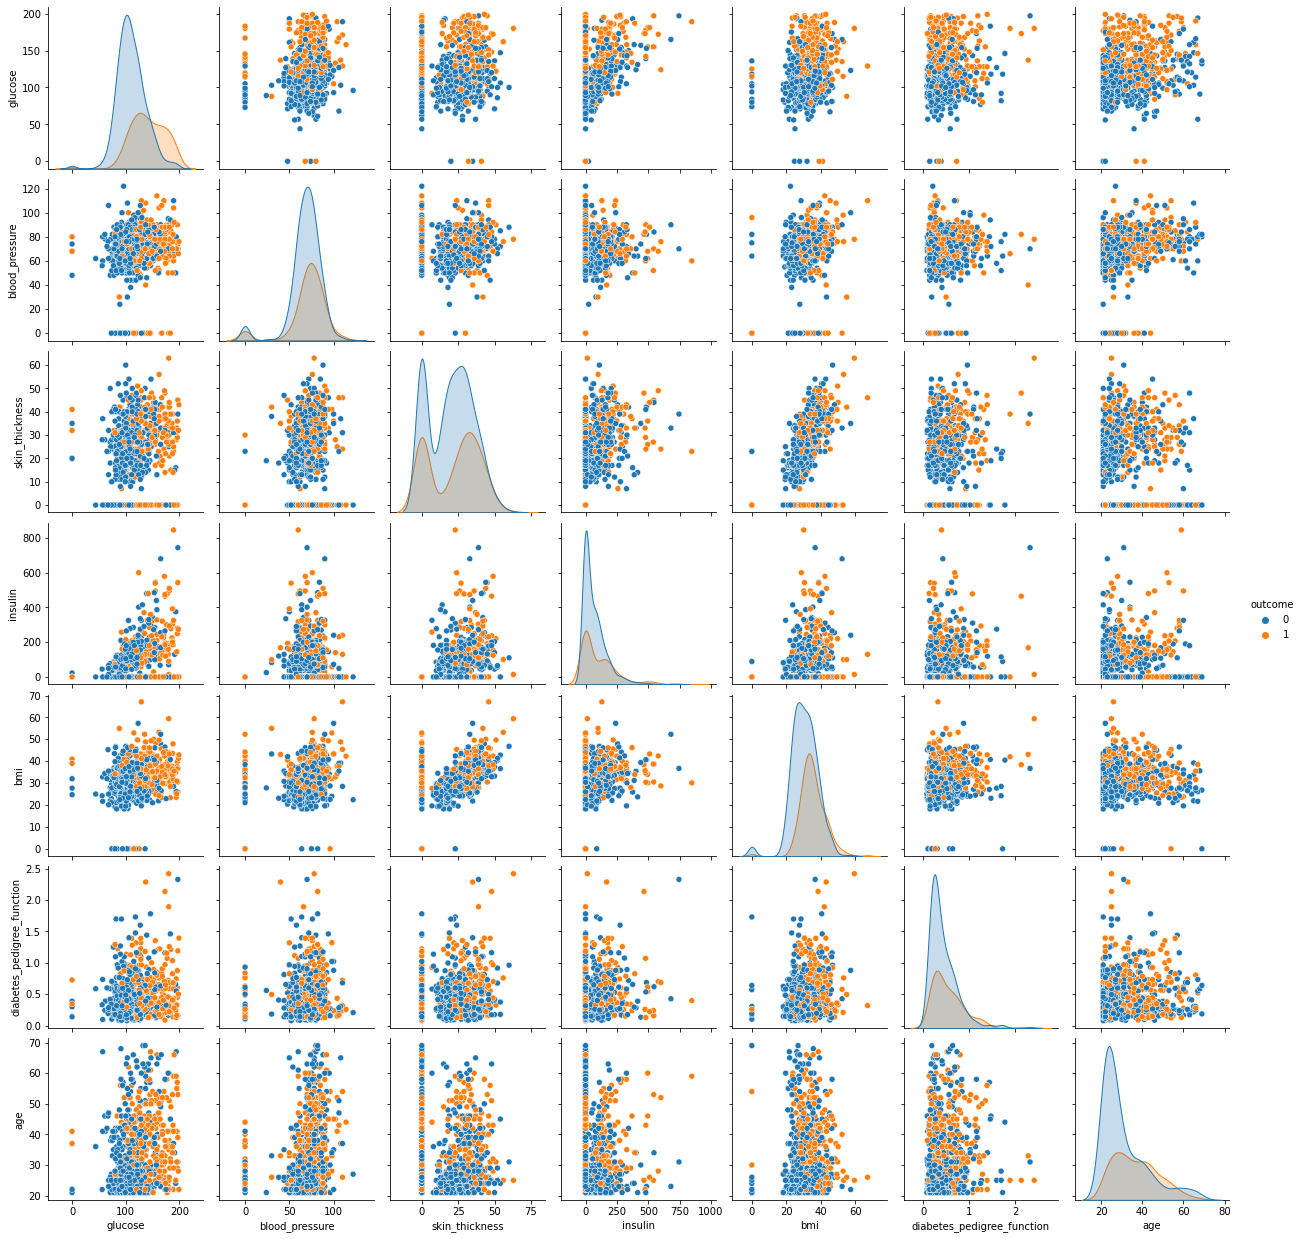

In [83]:
sns.pairplot(df2, hue = "outcome")

In [147]:
df2

,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,outcome
0,148,72,35,0,33.6,0.627,1
1,85,66,29,0,26.6,0.351,0
2,183,64,0,0,23.3,0.672,1
3,89,66,23,94,28.1,0.167,0
4,137,40,35,168,43.1,2.288,1
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,0
764,122,70,27,0,36.8,0.340,0
765,121,72,23,112,26.2,0.245,0
766,126,60,0,0,30.1,0.349,1


In [148]:
x = df.drop(columns= "outcome")

In [149]:
y = df["outcome"]

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [152]:
logreg = LogisticRegression(max_iter=10000)

In [153]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [154]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [155]:
logreg.score(X_test, y_test)

0.7878787878787878

---

In [156]:
X_test

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
185,7,194,68,28,0,35.9,0.745,41
86,13,106,72,54,0,36.6,0.178,45
328,2,102,86,36,120,45.5,0.127,23
347,3,116,0,0,0,23.5,0.187,23
658,11,127,106,0,0,39.0,0.190,51
...,...,...,...,...,...,...,...,...
7,10,115,0,0,0,35.3,0.134,29
602,1,124,74,36,0,27.8,0.100,30
487,0,173,78,32,265,46.5,1.159,58
182,1,0,74,20,23,27.7,0.299,21


In [157]:
(X_test.iloc[0])

pregnancies                     7.000
glucose                       194.000
blood_pressure                 68.000
skin_thickness                 28.000
insulin                         0.000
bmi                            35.900
diabetes_pedigree_function      0.745
age                            41.000
Name: 185, dtype: float64

In [158]:
test = X_test.iloc[[0]]
test

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
185,7,194,68,28,0,35.9,0.745,41


In [159]:
df.loc[[155]]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
155,7,152,88,44,0,50.0,0.337,36,1


In [160]:
logreg.predict(test)[0]

1